In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
df=pd.read_csv("C:\\Users\\dell\\Downloads\\Student_Performance.csv")

In [216]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [217]:
df.shape

(10000, 6)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [219]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [220]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [221]:
corr=df.select_dtypes(include=[np.number]).corr()

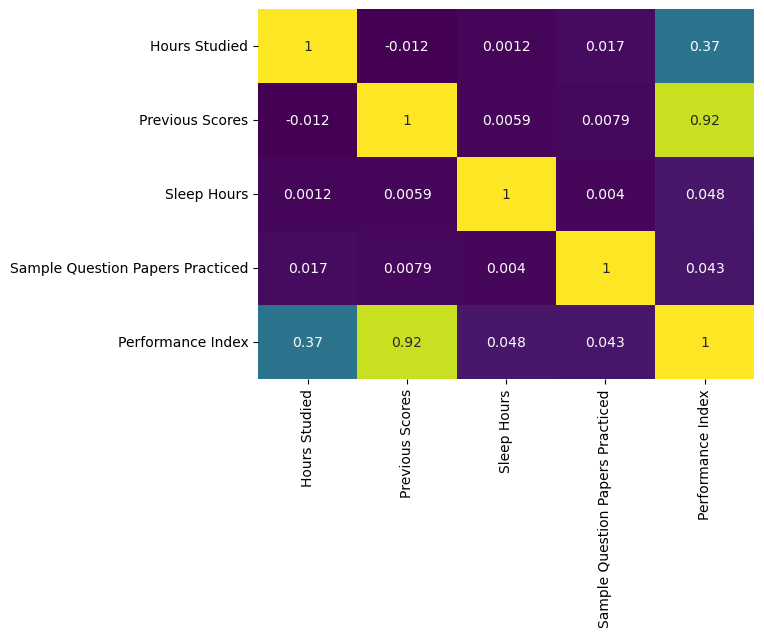

In [222]:
sns.heatmap(data=corr,cmap='viridis',cbar=False,yticklabels=True,annot=True)
plt.show()

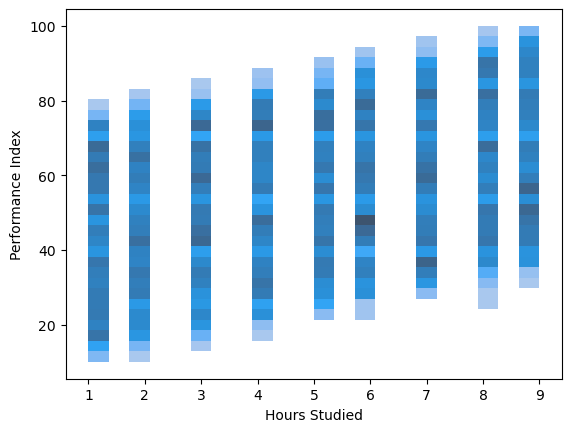

In [223]:
sns.histplot(data=df,x='Hours Studied',y='Performance Index')
plt.show()

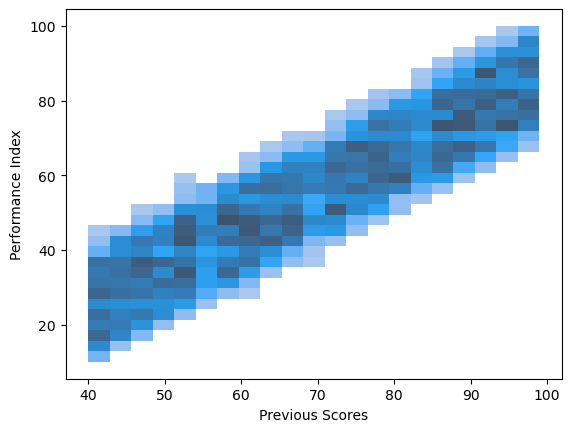

In [224]:
sns.histplot(data=df,x='Previous Scores',y='Performance Index')
plt.show()

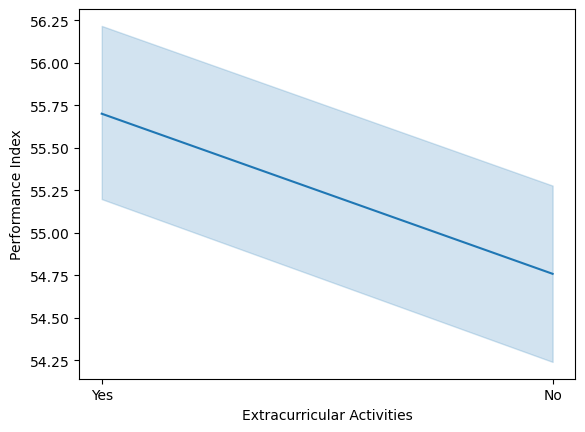

In [225]:
sns.lineplot(data=df,x='Extracurricular Activities',y='Performance Index')
plt.show()

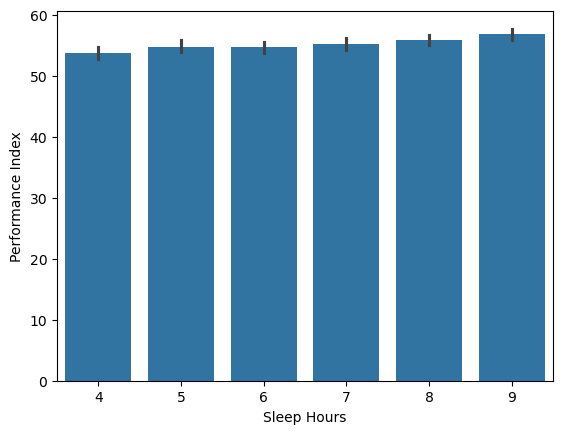

In [226]:
sns.barplot(data=df,x='Sleep Hours',y='Performance Index')
plt.show()

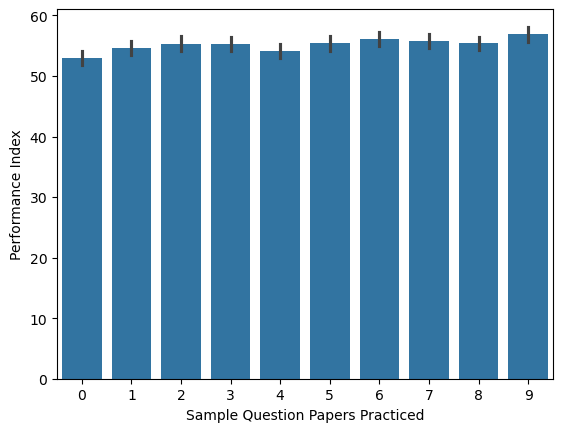

In [227]:
sns.barplot(data=df,x='Sample Question Papers Practiced',y='Performance Index')
plt.show()

In [228]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [229]:
inputs=df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]

In [230]:
targets = df['Performance Index']

## considering numerical and categorical cols

In [231]:
numerical_cols = inputs.select_dtypes(include=[np.number]).columns

In [232]:
categorical_cols = inputs.select_dtypes(include='object').columns

In [233]:
df[numerical_cols]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [234]:
df[categorical_cols]

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


## Scaling the numerical values

In [235]:
from sklearn.preprocessing import MinMaxScaler

In [236]:
scaler = MinMaxScaler().fit(df[numerical_cols])

In [237]:
df[numerical_cols]=scaler.transform(df[numerical_cols])

In [238]:
df[numerical_cols].head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,0.750,1.000000,1.0,0.111111
1,0.375,0.711864,0.0,0.222222
2,0.875,0.186441,0.6,0.222222
3,0.500,0.203390,0.2,0.222222
4,0.750,0.593220,0.8,0.555556


## Encoding the categorical_cols

In [239]:
from sklearn.preprocessing import OneHotEncoder

In [240]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])

In [241]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [242]:
encoded_cols

['Extracurricular Activities_No', 'Extracurricular Activities_Yes']

In [243]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [244]:
df[encoded_cols] 

,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
9995,0.0,1.0
9996,0.0,1.0
9997,0.0,1.0
9998,0.0,1.0


In [247]:
train = pd.concat([df[numerical_cols], df[encoded_cols]], axis=1)


In [248]:
train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.750,1.000000,1.0,0.111111,0.0,1.0
1,0.375,0.711864,0.0,0.222222,1.0,0.0
2,0.875,0.186441,0.6,0.222222,0.0,1.0
3,0.500,0.203390,0.2,0.222222,0.0,1.0
4,0.750,0.593220,0.8,0.555556,1.0,0.0
...,...,...,...,...,...,...
9995,0.000,0.152542,0.0,0.222222,0.0,1.0
9996,0.750,0.406780,0.8,0.555556,0.0,1.0
9997,0.625,0.728814,0.8,0.555556,0.0,1.0
9998,1.000,0.966102,0.6,0.000000,0.0,1.0


### Splitting the data

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X= train
y= targets

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [260]:
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (8000, 6)
Testing Features Shape: (2000, 6)
Training Labels Shape: (8000,)
Testing Labels Shape: (2000,)


### model prediction

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [277]:
model = LinearRegression().fit(X_train, y_train)
pred=model.predict(X_test)
pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [278]:
rmse = np.sqrt(mean_squared_error(pred,y_test))

In [279]:
rmse

2.0205515085050076

In [280]:
mae=mean_absolute_error(pred,y_test)

In [281]:
mae

1.6111213463123057

In [282]:
r2=r2_score(pred,y_test)

In [283]:
r2

0.9887203279837657

## Using the ridge and Lasso for regularization 

In [286]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [304]:
model = Ridge(alpha=0.1).fit(X_train,y_train)

In [305]:
ridge_preds = model.predict(X_test)

In [306]:
ridge_preds

array([54.71188092, 22.62011978, 47.9044131 , ..., 16.79882568,
       63.34195121, 45.94395967])

In [307]:
rmse = np.sqrt(mean_squared_error(ridge_preds,y_test))
rmse

2.020717250889946

In [308]:
mae = mean_absolute_error(ridge_preds,y_test)
mae

1.6112395648339972

In [309]:
r2 = r2_score(ridge_preds,y_test)
r2

0.9887152809943396

### Using different alpha values inorder to reduce the rmse values

In [310]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

alphas = [0.01, 0.1, 1, 10, 100, 200]
results = []

for a in alphas:
    model = Ridge(alpha=a).fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append((a, rmse, mae, r2))

for r in results:
    print(f"Alpha={r[0]} | RMSE={r[1]:.3f} | MAE={r[2]:.3f} | R²={r[3]:.4f}")


Alpha=0.01 | RMSE=2.021 | MAE=1.611 | R²=0.9890
Alpha=0.1 | RMSE=2.021 | MAE=1.611 | R²=0.9890
Alpha=1 | RMSE=2.022 | MAE=1.612 | R²=0.9890
Alpha=10 | RMSE=2.054 | MAE=1.636 | R²=0.9886
Alpha=100 | RMSE=3.201 | MAE=2.598 | R²=0.9723
Alpha=200 | RMSE=4.773 | MAE=3.946 | R²=0.9385


## Observations 
- for alpha 0.01 and alpha 0.1 having the less rmse score we can consider one of them.

## Using the Decision tree

In [312]:
from sklearn.tree import DecisionTreeRegressor

In [318]:
model = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [319]:
preds = model.predict(X_test)

In [320]:
preds

array([55., 24., 45., ..., 18., 58., 44.])

In [321]:
rmse = np.sqrt(mean_squared_error(preds,y_test))
rmse

2.964130470212883

## we got more loss value compared to the above ridge.
### use hyperparameter tuning for this decision tree

In [ ]:
## creating a function inorder to place more arguments/ parameters into the model

In [330]:
def try_parameters(**params):
    model = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(preds,y_test))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    return {"RMSE": rmse, "MAE": mae, "R2": r2}

In [331]:
try_parameters(max_depth=10,min_samples_split=3)

{'RMSE': 2.964130470212883,
 'MAE': 2.3320833333333333,
 'R2': 0.9762913590829577}

In [323]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

### Using the Random Forest Regressor

In [332]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("RF MAE:", mean_absolute_error(y_test, rf_preds))
print("RF R2:", r2_score(y_test, rf_preds))

RF RMSE: 2.172132553056157
RF MAE: 1.7301577899739393
RF R2: 0.9872683504427462


In [333]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGB RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGB MAE:", mean_absolute_error(y_test, xgb_preds))
print("XGB R2:", r2_score(y_test, xgb_preds))


XGB RMSE: 2.127196836940684
XGB MAE: 1.6912111201286315
XGB R2: 0.9877896704758902


In [ ]:
Ridge got better value compared to other model